In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#### Inspecting the data
#### Prepping our Baseline Metric using the for accuracy_score, precision_score, recall_score and the f1_score.
#### Trying to handtune the hyperparameters.
#### Exploring both the RandomizedSearch and GridsearchCV and see if there will be any changes.
#### Do a cross_val_score, roc_curve, roc_auc_score to see if a better insight can be gotten.

## Inspecting our data

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.isna().sum()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Baseline Metric

In [4]:
## shuffle your dataset

diabetes_reshuffled = diabetes.sample(frac=1)
diabetes_reshuffled.rename(columns=str.lower, inplace=True)

## split into features and target

X = diabetes_reshuffled.drop('outcome', axis=1)
y = diabetes_reshuffled['outcome']

## fix your model
np.random.seed(0)
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
fitted_train = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## write a func and test for all 00

def report(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics_dict = {'acc': round(accuracy, 2),
                   'pre': round(precision, 2),
                   'rec': round(recall, 2),
                   'f1': round(f1, 2)}
    
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}%')
    print(f'Recall: {recall:.2f}%')
    print(f'F1: {f1:.2f}%')
    
    return metrics_dict
    


baseline_metrics = report(y_test, y_pred)
baseline_metrics


Accuracy: 0.79%
Precision: 0.67%
Recall: 0.60%
F1: 0.64%


{'acc': 0.79, 'pre': 0.67, 'rec': 0.6, 'f1': 0.64}

## Handtuning

In [5]:
np.random.seed(0)
clf_2 = RandomForestClassifier(n_estimators=200, max_depth=10)
clf_2.fit(X_train, y_train)
y_pred_tune = clf_2.predict(X_test)
handtune_metrics = report(y_test, y_pred_tune)
handtune_metrics

Accuracy: 0.76%
Precision: 0.63%
Recall: 0.56%
F1: 0.59%


{'acc': 0.76, 'pre': 0.63, 'rec': 0.56, 'f1': 0.59}

## RandomizedSearchCV

In [54]:

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
       'max_depth': ['None', 5, 10, 20, 30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2, 4, 6],
       'min_samples_leaf': [1, 2, 4]}

np.random.seed(0)
clf_3 = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf_3,
                            param_distributions=grid,
                            n_iter=10,
                            cv = 5,
                            verbose = 2)

fitted_rs = rs_clf.fit(X_train, y_train)
y_pred_rs = rs_clf.predict(X_test)

randomized_metrics = report(y_test, y_pred_rs)
randomized_metrics



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

C:\Users\Idris Idris\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Idris Idris\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Idris Idris\Desktop\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Idris Idris\Desktop\sample_project_1\env\lib\site-packages\joblib\parallel.py", line 1043, in __call

Accuracy: 0.75%
Precision: 0.61%
Recall: 0.58%
F1: 0.60%


{'acc': 0.75, 'pre': 0.61, 'rec': 0.58, 'f1': 0.6}

## GridSearchCV

In [58]:
## decided to check for the best param to ease my gridsearch

rs_clf.best_params_


grid_2 = {'n_estimators': [50, 100, 200],
         'min_samples_split': [4, 6, 8],
         'min_samples_leaf': [1, 2, 3],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [10, 15, 20]}

clf_4 = RandomForestClassifier(n_jobs = 1)
gs_clf = GridSearchCV(estimator=clf_4,
                     param_grid=grid_2,
                     cv = 5,
                     verbose = 2)
np.random.seed(0)
gs_clf.fit(X_train, y_train)
y_pred_gs = gs_clf.predict(X_test)
grid_metric = report(y_test, y_pred_gs)
grid_metric

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; t

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, 

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=auto

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, mi

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, m

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=auto,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, 

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min

{'acc': 0.75, 'pre': 0.61, 'rec': 0.58, 'f1': 0.6}

In [13]:
## cross-val-score
np.random.seed(0)
diabetes_cross_val = cross_val_score(clf, X, y, cv=5)
diabetes_cross_val
avg_cross_val = np.mean(diabetes_cross_val)
avg_cross_val

0.7565317035905271

In [32]:
## ROC_Curve

y_pred_proba = clf.predict_proba(X_test)
y_pred_pos = y_pred_proba[:, 1]
y_pred_pos
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pos)




0.7924528301886793

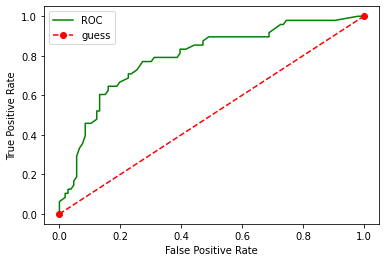

In [50]:
def plot_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0,1], [0,1], color='red', label='guess', linestyle='dashed', marker='o')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show();
    

plot_curve(fpr, tpr)

In [51]:
## ROC AUC Score
np.random.seed
roc_auc_score(y_test, y_pred_pos)

## Area under the curve above shows the model can only account for 79 per cent of the whole plot, the remaining 21 per cent 
## the model couldnt explain are above the green line.

0.7924528301886793

## Comparing the metrics


<AxesSubplot:>

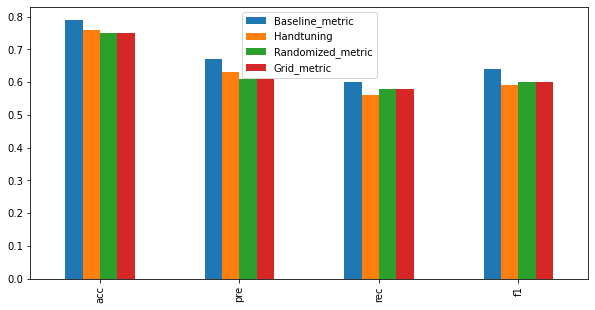

In [65]:
all_metrics_view = pd.DataFrame({'Baseline_metric': baseline_metrics,
                                 'Handtuning': handtune_metrics,
                                 'Randomized_metric': randomized_metrics,
                                 'Grid_metric': grid_metric})

all_metrics_view.plot(kind='bar', figsize=(10, 5))
